In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import ipywidgets as widgets
import pandas as pd
import numpy as np
import requests
from pprint import pprint
import matplotlib.patches as mpatches 
import time
import json
import random
import openweathermapy.core as owm
import seaborn as sns
from scipy.stats import linregress
import os
import pyowm
from config import api_key
from urllib.error import HTTPError
from urllib.parse import quote_plus
from datetime import datetime

# Import API key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

output_data_file = "Output/weather_df.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Replace spaces with %20 to create url correctly 
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:

        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

Perform API Calls

Perform a weather check on each city using a series of successive API calls. Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
# set lists for the dataframe

city_two = []
cloudiness = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
feels_like = []
wind_speeds = []
countries = []
name = []
i_d = []
# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudiness.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        feels_like.append(response['main']['feels_like'])
        wind_speeds.append(response['wind']['speed'])
        name.append(response['name'])
        i_d.append(response['City ID'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | komsomolskiy
Processing Record 2 of Set 1 | nanortalik
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | cape%20town
Processing Record 5 of Set 1 | khatanga
Processing Record 6 of Set 1 | manta
Processing Record 7 of Set 1 | aklavik
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | torbay
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | mataura
City not found. Skipping...
Processing Record 12 of Set 1 | victoria
City not found. Skipping...
Processing Record 13 of Set 1 | mandera
Processing Record 14 of Set 1 | ambon
Processing Record 15 of Set 1 | bathsheba
Processing Record 16 of Set 1 | mar%20del%20plata
City not found. Skipping...
Processing Record 17 of Set 1 | bambous%20virieux
Processing Record 18 of Set 1 | hobyo
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | gorontalo
Processing Record 21 of Set 1 | tasiilaq
Processing Record 22 of Set 1 | atuona
Processing Rec

Processing Record 40 of Set 4 | francistown
Processing Record 41 of Set 4 | provideniya
Processing Record 42 of Set 4 | karratha
Processing Record 43 of Set 4 | bulolo
City not found. Skipping...
Processing Record 44 of Set 4 | mlonggo
Processing Record 45 of Set 4 | jiwani
Processing Record 46 of Set 4 | iqaluit
Processing Record 47 of Set 4 | rovaniemi
Processing Record 48 of Set 4 | berlevag
City not found. Skipping...
Processing Record 49 of Set 4 | port%20elizabeth
Processing Record 1 of Set 5 | alofi
Processing Record 2 of Set 5 | kudahuvadhoo
Processing Record 3 of Set 5 | mora
Processing Record 4 of Set 5 | el%20angel
Processing Record 5 of Set 5 | wiang%20sa
Processing Record 6 of Set 5 | primorsko
Processing Record 7 of Set 5 | krasnyy%20chikoy
Processing Record 8 of Set 5 | alugan
Processing Record 9 of Set 5 | kieta
Processing Record 10 of Set 5 | kahului
Processing Record 11 of Set 5 | barra%20do%20garcas
Processing Record 12 of Set 5 | greeley
Processing Record 13 of Set 

Processing Record 30 of Set 8 | nyurba
Processing Record 31 of Set 8 | port-cartier
Processing Record 32 of Set 8 | tuatapere
Processing Record 33 of Set 8 | mahebourg
Processing Record 34 of Set 8 | alamosa
Processing Record 35 of Set 8 | coquimbo
Processing Record 36 of Set 8 | westport
Processing Record 37 of Set 8 | aykhal
Processing Record 38 of Set 8 | general%20roca
Processing Record 39 of Set 8 | ipixuna
Processing Record 40 of Set 8 | panaba
Processing Record 41 of Set 8 | pangody
Processing Record 42 of Set 8 | port%20hardy
Processing Record 43 of Set 8 | cranbrook
Processing Record 44 of Set 8 | salaga
Processing Record 45 of Set 8 | sarany
Processing Record 46 of Set 8 | koumac
City not found. Skipping...
Processing Record 47 of Set 8 | cordoba
City not found. Skipping...
City not found. Skipping...
Processing Record 48 of Set 8 | progreso
Processing Record 49 of Set 8 | codrington
Processing Record 1 of Set 9 | marondera
Processing Record 2 of Set 9 | zhuhai
Processing Rec

Processing Record 22 of Set 12 | gondanglegi
Processing Record 23 of Set 12 | nouakchott
Processing Record 24 of Set 12 | albufeira
Processing Record 25 of Set 12 | geraldton
City not found. Skipping...
Processing Record 26 of Set 12 | kumano
------------------------------
Data Retrieval Complete
------------------------------


Convert Raw Data to DataFrame

Export the city data into a .csv. Display the DataFrame

In [8]:
# create dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudiness,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds,
    "Feels like":feels_like,
    "Name":name,
}

In [9]:
# create dataframe
weather_dataframe = pd.DataFrame(weather_dict)
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Feels like,Name
0,komsomolskiy,75,UZ,1580076193,86,40.43,71.72,37.40,2.24,29.77,Yangi Marg`ilon
1,nanortalik,100,GL,1580076193,70,60.14,-45.24,22.42,14.45,8.80,Nanortalik
2,tuktoyaktuk,75,CA,1580076194,67,69.45,-133.04,-22.00,5.82,-32.28,Tuktoyaktuk
3,cape%20town,20,ZA,1580075963,72,-33.93,18.42,62.01,6.93,57.09,Cape Town
4,khatanga,93,RU,1580076194,98,71.97,102.50,-21.46,1.03,-28.93,Khatanga


In [10]:
# output data to csv
weather_dataframe.to_csv('output_data/cities.csv')

In [11]:
# This code is here so that I can continue to tweak my graphs and the rest of my code without doing a new api call every time
weather_dataframe = pd.read_csv('output_data/cities.csv')

In [12]:
weather_dataframe.count()

Unnamed: 0    565
City          565
Cloudiness    565
Country       561
Date          565
Humidity      565
Lat           565
Lng           565
Max Temp      565
Wind Speed    565
Feels like    565
Name          565
dtype: int64

In [13]:
weather_dataframe.head()

,Unnamed: 0,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Feels like,Name
0,0,komsomolskiy,75,UZ,1580076193,86,40.43,71.72,37.40,2.24,29.77,Yangi Marg`ilon
1,1,nanortalik,100,GL,1580076193,70,60.14,-45.24,22.42,14.45,8.80,Nanortalik
2,2,tuktoyaktuk,75,CA,1580076194,67,69.45,-133.04,-22.00,5.82,-32.28,Tuktoyaktuk
3,3,cape%20town,20,ZA,1580075963,72,-33.93,18.42,62.01,6.93,57.09,Cape Town
4,4,khatanga,93,RU,1580076194,98,71.97,102.50,-21.46,1.03,-28.93,Khatanga


Plotting the Data

Use proper labeling of the plots using plot titles (including date of analysis) and axes labels. Save the plotted figures as .pngs.


In [14]:
# switches to seaborn default display
sns.set()

In [15]:
# gets current date
cur_date = datetime.now()                                                    

Latitude vs. Temperature Plot

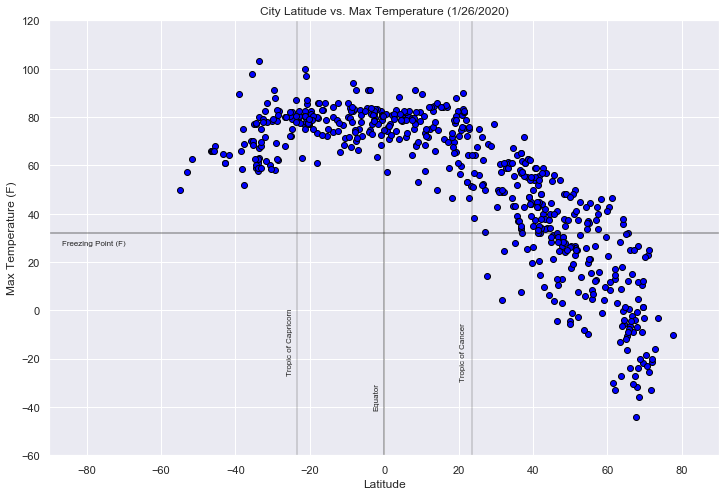

In [16]:
# create graph
plt.figure(figsize = (12, 8))                                                
plt.scatter(weather_dataframe['Lat'], weather_dataframe['Max Temp'], marker="o", facecolors='blue', edgecolors='black')
plt.xlim(-90, 90)
plt.ylim(-60, 120)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.axvline(0, c='k', alpha=.4)
plt.axvline(23.5, c='k', alpha=.2)
plt.axvline(-23.5, c='k', alpha=.2)
plt.axhline(32, c='k', alpha=.4)
plt.title('City Latitude vs. Max Temperature (%s/%s/%s' % (cur_date.month, cur_date.day, cur_date.year) + ')')
plt.gcf().text(.50, .205, 'Equator', fontsize=8, rotation='vertical')
plt.gcf().text(.40, .265, 'Tropic of Capricorn', fontsize=8, rotation='vertical')
plt.gcf().text(.60, .255, 'Tropic of Cancer', fontsize=8, rotation='vertical')
plt.gcf().text(.14, .49, 'Freezing Point (F)', fontsize=8, rotation='horizontal')
plt.savefig("figures/fig1.png")
plt.show()                                                                  

Latitude vs. Humidity Plot

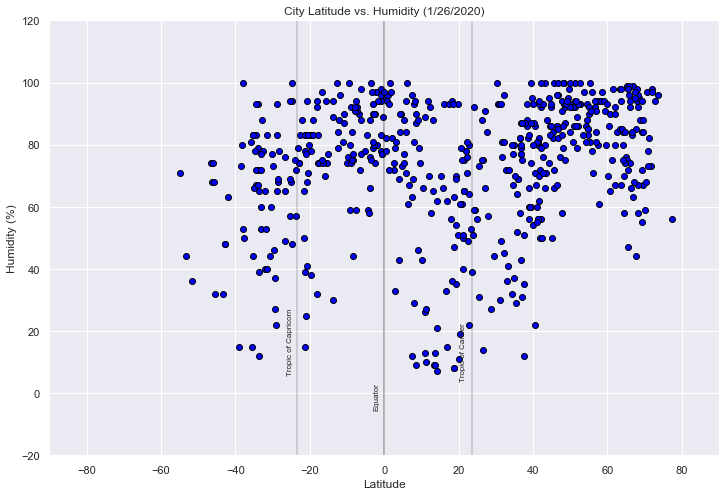

In [17]:
# create graph
plt.figure(figsize = (12, 8))                                                
plt.scatter(weather_dataframe['Lat'], weather_dataframe['Humidity'], marker="o", facecolors='blue', edgecolors='black')
plt.xlim(-90, 90)
plt.ylim(-20, 120)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.axvline(0, c='k', alpha=.4)
plt.axvline(23.5, c='k', alpha=.2)
plt.axvline(-23.5, c='k', alpha=.2)
plt.title('City Latitude vs. Humidity (%s/%s/%s' % (cur_date.month, cur_date.day, cur_date.year) + ')')
plt.gcf().text(.50, .205, 'Equator', fontsize=8, rotation='vertical')
plt.gcf().text(.40, .265, 'Tropic of Capricorn', fontsize=8, rotation='vertical')
plt.gcf().text(.60, .255, 'Tropic of Cancer', fontsize=8, rotation='vertical')
plt.savefig("figures/fig2.png")
plt.show() 

Latitude vs. Cloudiness

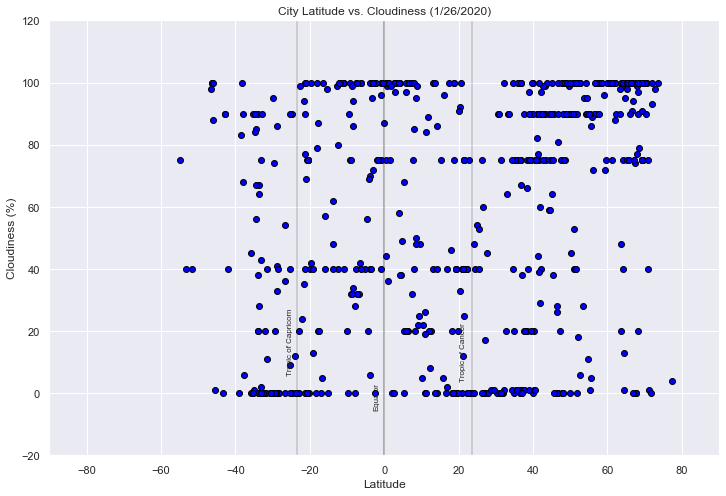

In [18]:
# create graph
plt.figure(figsize = (12, 8))                                               
plt.scatter(weather_dataframe['Lat'], weather_dataframe['Cloudiness'], marker="o", facecolors='blue', edgecolors='black')
plt.xlim(-90, 90)
plt.ylim(-20, 120)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.axvline(0, c='k', alpha=.4)
plt.axvline(23.5, c='k', alpha=.2)
plt.axvline(-23.5, c='k', alpha=.2)
plt.title('City Latitude vs. Cloudiness (%s/%s/%s' % (cur_date.month, cur_date.day, cur_date.year) + ')')
plt.gcf().text(.50, .205, 'Equator', fontsize=8, rotation='vertical')
plt.gcf().text(.40, .265, 'Tropic of Capricorn', fontsize=8, rotation='vertical')
plt.gcf().text(.60, .255, 'Tropic of Cancer', fontsize=8, rotation='vertical')
plt.savefig("figures/fig3.png")
plt.show()                                                                  

Latitude vs. Wind Speed

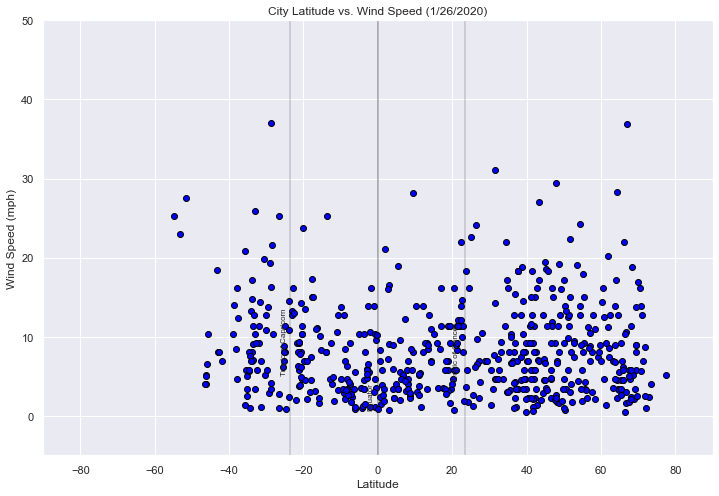

In [19]:
# create graph
plt.figure(figsize = (12, 8))                                                
plt.scatter(weather_dataframe['Lat'], weather_dataframe['Wind Speed'], marker="o", facecolors='blue', edgecolors='black')
plt.xlim(-90, 90)
plt.ylim(-5, 50)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.axvline(0, c='k', alpha=.4)
plt.axvline(23.5, c='k', alpha=.2)
plt.axvline(-23.5, c='k', alpha=.2)
plt.title('City Latitude vs. Wind Speed (%s/%s/%s' % (cur_date.month, cur_date.day, cur_date.year) + ')')
plt.gcf().text(.50, .205, 'Equator', fontsize=8, rotation='vertical')
plt.gcf().text(.40, .265, 'Tropic of Capricorn', fontsize=8, rotation='vertical')
plt.gcf().text(.60, .255, 'Tropic of Cancer', fontsize=8, rotation='vertical')
plt.savefig("figures/fig4.png")
plt.show()  

In [20]:
# create dataframe for all the cities
weather_dataframe['temp_v'] = "xkcd:dark purple"                                     
weather_dataframe.loc[weather_dataframe['Max Temp'] > 0, 'temp_v'] = "xkcd:violet"           
weather_dataframe.loc[weather_dataframe['Max Temp'] > 10, 'temp_v'] = "xkcd:indigo blue"
weather_dataframe.loc[weather_dataframe['Max Temp'] > 20, 'temp_v'] = "xkcd:blue"
weather_dataframe.loc[weather_dataframe['Max Temp'] > 30, 'temp_v'] = "xkcd:green"
weather_dataframe.loc[weather_dataframe['Max Temp'] > 40, 'temp_v'] = "xkcd:sea green"
weather_dataframe.loc[weather_dataframe['Max Temp'] > 50, 'temp_v'] = "xkcd:yellow green"
weather_dataframe.loc[weather_dataframe['Max Temp'] > 60, 'temp_v'] = "xkcd:yellow"
weather_dataframe.loc[weather_dataframe['Max Temp'] > 70, 'temp_v'] = "xkcd:orange"
weather_dataframe.loc[weather_dataframe['Max Temp'] > 80, 'temp_v'] = "xkcd:reddish orange"
weather_dataframe.loc[weather_dataframe['Max Temp'] > 90, 'temp_v'] = "xkcd:red"

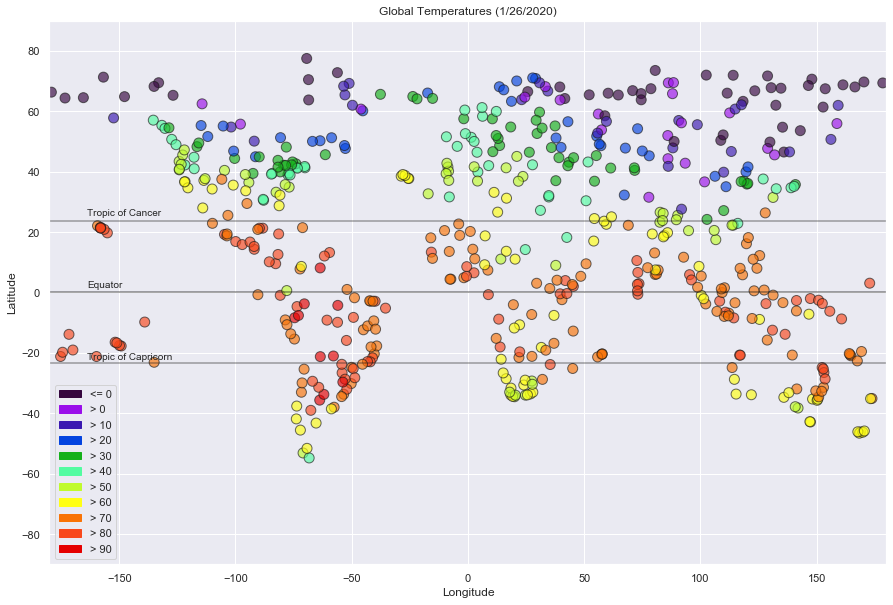

In [21]:
# create graph
fig = plt.figure(figsize=(15,10))                                           
ax = fig.add_subplot(1,1,1)
ax.scatter(weather_dataframe['Lng'], weather_dataframe['Lat'], color=weather_dataframe["temp_v"], s=100,  alpha=.65, edgecolors="k")
handles, labels = ax.get_legend_handles_labels()
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.title('Global Temperatures (%s/%s/%s' % (cur_date.month, cur_date.day, cur_date.year) + ')')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.gcf().text(.16,.51,"Equator", fontsize=10)
plt.gcf().text(.16,.61,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.41,"Tropic of Capricorn", fontsize=10)

templt0 = mpatches.Patch(color='xkcd:dark purple', label='<= 0')
tempgt0 = mpatches.Patch(color='xkcd:violet', label='> 0')
tempgt10 = mpatches.Patch(color='xkcd:indigo blue', label='> 10')
tempgt20 = mpatches.Patch(color='xkcd:blue', label='> 20')
tempgt30 = mpatches.Patch(color='xkcd:green', label='> 30')
tempgt40 = mpatches.Patch(color='xkcd:sea green', label='> 40')
tempgt50 = mpatches.Patch(color='xkcd:yellow green', label='> 50')
tempgt60 = mpatches.Patch(color='xkcd:yellow', label='> 60')
tempgt70 = mpatches.Patch(color='xkcd:orange', label='> 70')
tempgt80 = mpatches.Patch(color='xkcd:reddish orange', label='> 80')
tempgt90 = mpatches.Patch(color='xkcd:red', label='> 90')

plt.legend(handles=[templt0,
                    tempgt0,
                    tempgt10,
                    tempgt20,
                    tempgt30,
                    tempgt40,
                    tempgt50,
                    tempgt60,
                    tempgt70,
                    tempgt80,
                    tempgt90], frameon=True, loc="lower left")
plt.savefig("figures/fig5.png")
plt.show()                                                                   # displays plot

Create a function to create Linear Regression plots Create Northern and Southern Hemisphere DataFrames

In [22]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_dataframe.loc[pd.to_numeric(weather_dataframe["Lat"]).astype(float) > 0, :]
southern_df = weather_dataframe.loc[pd.to_numeric(weather_dataframe["Lat"]).astype(float) < 0, :]

Regression line equation is: y = -1.31x + 91.82
The r-squared is: -0.8626345581619049


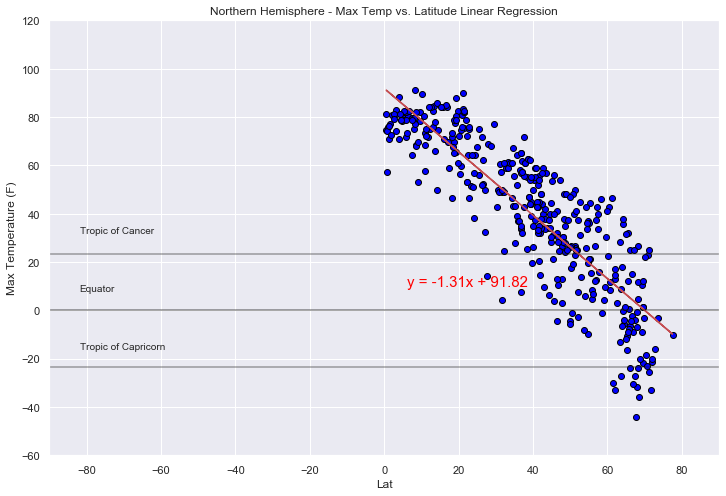

In [35]:
# create linear regression chart for Northern Hemisphere Temp vs. Latitude
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.figure(figsize = (12,8))
plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlim(-90,90)
plt.ylim(-60,120)
plt.xlabel('Lat')
plt.ylabel('Max Temperature (F)')
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.gcf().text(.16,.41,"Equator", fontsize=10)
plt.gcf().text(.16,.51,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.31,"Tropic of Capricorn", fontsize=10)
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.savefig("figures/fig6.png")
plt.show()

Regression line equation is: y = -1.31x + 91.82
The r-squared is: -0.8626345581619049

Regression line equation is: y = 0.31x + 82.2
The r-squared is: 0.44443303559869685


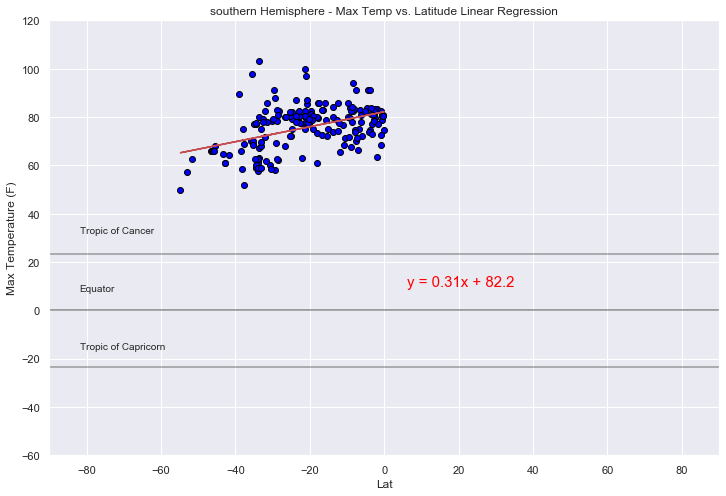

In [36]:
# create linear regression chart for Southern Hemisphere Temp vs. Latitude
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.figure(figsize = (12,8))
plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlim(-90,90)
plt.ylim(-60,120)
plt.xlabel('Lat')
plt.ylabel('Max Temperature (F)')
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.gcf().text(.16,.41,"Equator", fontsize=10)
plt.gcf().text(.16,.51,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.31,"Tropic of Capricorn", fontsize=10)
plt.title('southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.savefig("figures/fig7.png")
plt.show()

Regression line equation is: y = 0.31x + 82.2
The r-squared is: 0.44443303559869685

Regression line equation is: y = 0.37x + 59.75
The r-squared is: 0.34500838940509704


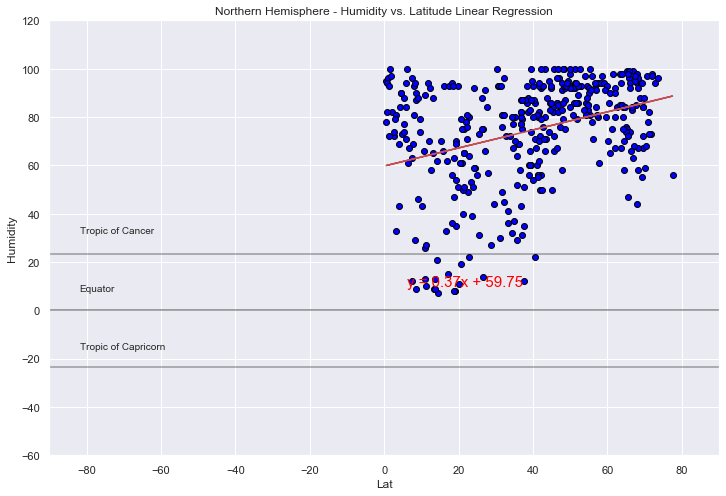

In [37]:
# create linear regression chart for Northern Hemisphere Humidity vs. Latitude
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.figure(figsize = (12,8))
plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlim(-90,90)
plt.ylim(-60,120)
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.gcf().text(.16,.41,"Equator", fontsize=10)
plt.gcf().text(.16,.51,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.31,"Tropic of Capricorn", fontsize=10)
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.savefig("figures/fig8.png")
plt.show()

Regression line equation is: y = 0.37x + 59.75
The r-squared is: 0.34500838940509704

Regression line equation is: y = 0.65x + 86.14
The r-squared is: 0.4403084191171747


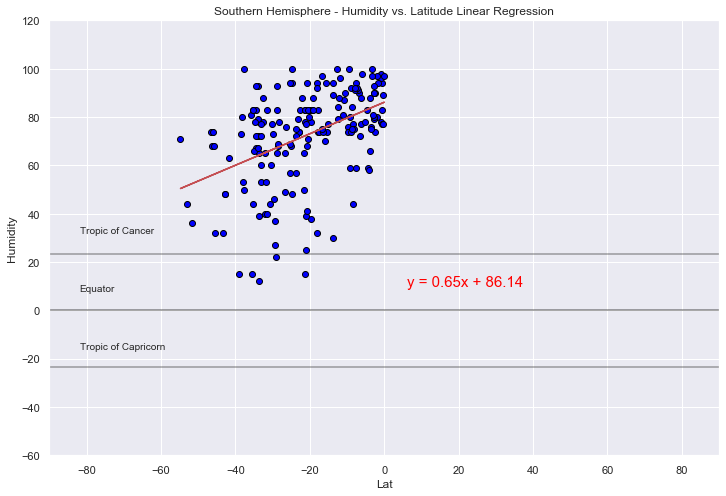

In [38]:
# create linear regression chart for Southern Hemisphere Humidity vs. Latitude
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.figure(figsize = (12,8))
plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlim(-90,90)
plt.ylim(-60,120)
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.gcf().text(.16,.41,"Equator", fontsize=10)
plt.gcf().text(.16,.51,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.31,"Tropic of Capricorn", fontsize=10)
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.savefig("figures/fig9.png")
plt.show()

Regression line equation is: y = 0.65x + 86.14
The r-squared is: 0.4403084191171747

Regression line equation is: y = 0.53x + 40.07
The r-squared is: 0.2821809962591781


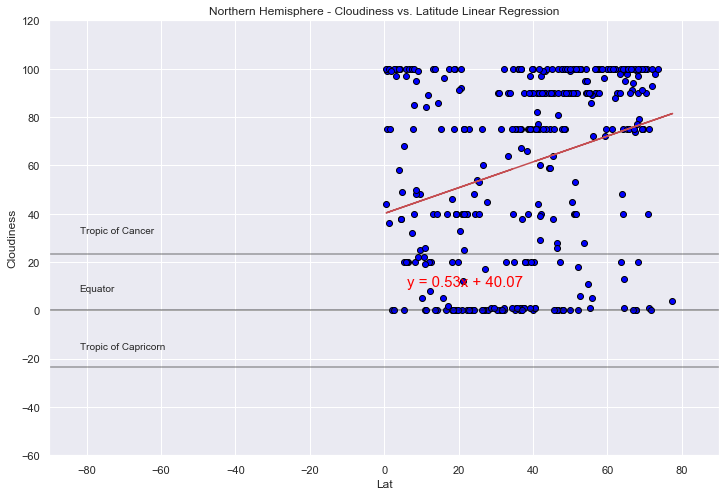

In [39]:
# create linear regression chart for Northern Hemisphere Cloudiness vs. Latitude
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.figure(figsize = (12,8))
plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlim(-90,90)
plt.ylim(-60,120)
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.gcf().text(.16,.41,"Equator", fontsize=10)
plt.gcf().text(.16,.51,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.31,"Tropic of Capricorn", fontsize=10)
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.savefig("figures/fig10.png")
plt.show()

Regression line equation is: y = 0.53x + 40.07
The r-squared is: 0.2821809962591781

Regression line equation is: y = 0.68x + 65.97
The r-squared is: 0.2373312261905223


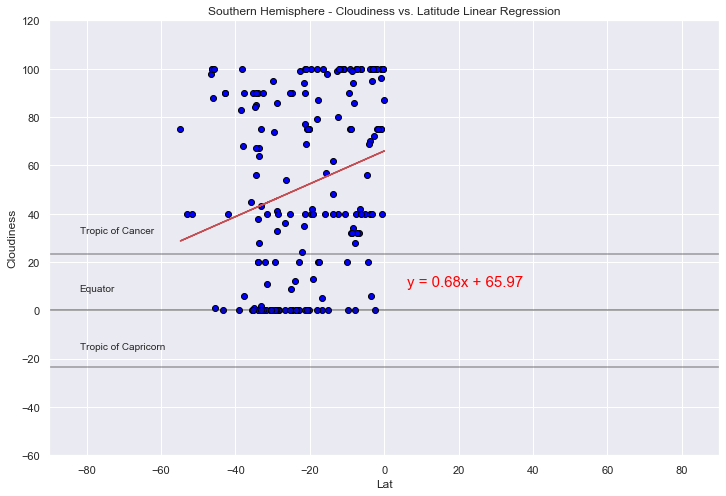

In [40]:
# create linear regression chart for Southern Hemisphere Cloudiness vs. Latitude
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.figure(figsize = (12,8))
plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlim(-90,90)
plt.ylim(-60,120)
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.gcf().text(.16,.41,"Equator", fontsize=10)
plt.gcf().text(.16,.51,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.31,"Tropic of Capricorn", fontsize=10)
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.savefig("figures/fig11.png")
plt.show()

Regression line equation is: y = 0.68x + 65.97
The r-squared is: 0.2373312261905223

Regression line equation is: y = 0.02x + 7.46
The r-squared is: 0.06338297336516441


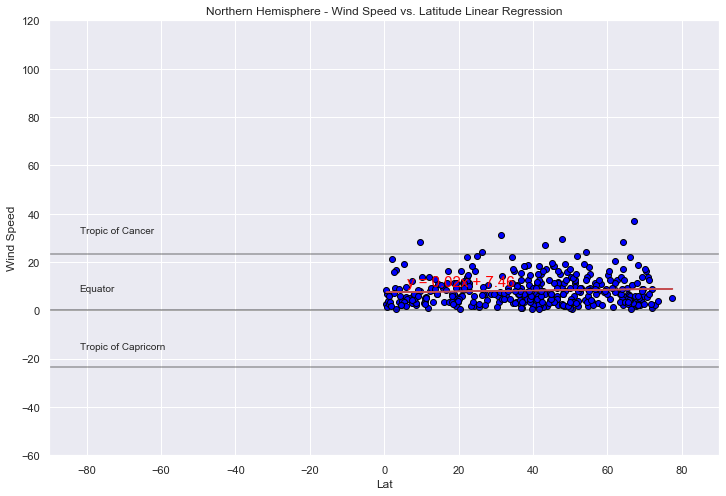

In [41]:
# create linear regression chart for Northern Hemisphere Wind Speed vs. Latitude
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.figure(figsize = (12,8))
plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlim(-90,90)
plt.ylim(-60,120)
plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.gcf().text(.16,.41,"Equator", fontsize=10)
plt.gcf().text(.16,.51,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.31,"Tropic of Capricorn", fontsize=10)
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.savefig("figures/fig12.png")
plt.show()

Regression line equation is: y = 0.02x + 7.46
The r-squared is: 0.06338297336516441

Regression line equation is: y = -0.15x + 5.32
The r-squared is: -0.3202157412030664


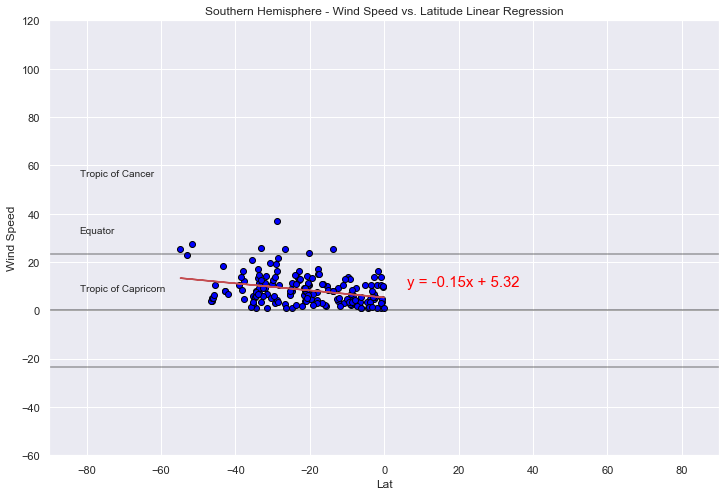

In [42]:
# create linear regression chart for Southern Hemisphere Wind Speed vs. Latitude
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.figure(figsize = (12,8))
plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlim(-90,90)
plt.ylim(-60,120)
plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.gcf().text(.16,.51,"Equator", fontsize=10)
plt.gcf().text(.16,.61,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.41,"Tropic of Capricorn", fontsize=10)
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.savefig("figures/fig13.png")
plt.show()

Regression line equation is: y = -0.15x + 5.32
The r-squared is: -0.3202157412030664
